<a href="https://colab.research.google.com/github/dudasimonassi/HackathonIA/blob/main/Competicao_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Competição de IA: Desafio de Previsão de Preços de Imóveis

Etapas para compilação correta do código:
1.   Realizar o download da base de dados e colocar no Drive;
2.   Mudar o caminho no código para a leitura do arquivo.

Dicas e boas estratégias para se ter uma boa previsão:
1.   Implementar outras etapas de pré-processamento (outliers, normalização, etc);
2.   Observar o comportamento dos dados;
3.   Utilizar outros modelos de regressão;
4.   Usar um otimizador de hyperparâmetros;
5.   Analizar as diferenças entre os valores reais e previstos;


**Fazer a submissão no formulário antes do prazo de encerramento.**

Links:
*   Regulamento: https://drive.google.com/file/d/1MA2KaBSQTOh0HMG8yMneW2Qdw0wlMxxC/view?usp=share_link
*   Base de Dados: https://docs.google.com/spreadsheets/d/140EhqT7kTrRhys20-bBeA2nXZtx2JVki/edit?usp=share_link&ouid=103873027701310997143&rtpof=true&sd=true
*   Formulário: https://forms.gle/ASLn711xNrZtzfDv7



## Bibliotecas

**OBS:** Essas são bibliotecas recomendadas, não sendo obrigatória a sua utilização. O uso de bibliotecas adicionais é permitido.

In [34]:
# Manipulação e análise de dados
import pandas as pd
import numpy as np
# Plotagem de gráficos
import matplotlib.pyplot as plt
# Distribuição de dados para o treino e teste
from sklearn.model_selection import train_test_split
# Métricas
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

# Funções matemáticas
import math

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
# Modelos (apenas como ilustração)
from sklearn.linear_model import LinearRegression
# Localização para o Teste Online
from geopy.geocoders import Nominatim

## Dados

**OBS:** Apenas são permitidas modificações na base de dados utilizando linhas de código.

### Importação da Base de dados

In [5]:
# Executando a célula para montar o Drive
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

**MUDAR O CAMINHO DO ARQUIVO**

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Competicao_IA_Dados.xlsx')
df

In [6]:
df = pd.read_excel('Competicao_IA_Dados.xlsx')
df

,ID,Cidade,Bairro,Tipo,m2,Quartos,Banheiros,Vagas,Preço,Condomínio,IPTU,Latitude,Longitude
0,0,Juiz de Fora - MG,Centro,Studio,34,1,1,0,"R$ 1.400,00","R$ 150,00","R$ 0,00",-21.759859,-43.346727
1,1,Juiz de Fora - MG,Granbery,Apartamento,92,3,2,0,"R$ 1.900,00","R$ 220,00","R$ 161,28",-21.767548,-43.343795
2,2,Juiz de Fora - MG,Santo Antônio,Apartamento,45,2,1,0,"R$ 600,00","R$ 132,00","R$ 125,00",-21.773246,-43.312741
3,3,Juiz de Fora - MG,Centro,Apartamento,71,1,1,1,"R$ 1.400,00","R$ 404,00","R$ 133,00",-21.759859,-43.346727
4,4,Juiz de Fora - MG,Joquei Clube,Apartamento,55,2,1,1,"R$ 700,00","R$ 300,00","R$ 0,00",-21.725834,-43.397439
...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,936,Juiz de Fora - MG,Bonfim,Loja,97,2,1,1,"R$ 800,00","R$ 200,00","R$ 30,00",-21.738407,-43.344741
937,937,Juiz de Fora - MG,Marilândia,Loja,91,2,2,1,"R$ 1.100,00","R$ 60,00","R$ 0,00",-21.787171,-43.390735
938,938,Juiz de Fora - MG,Carlos Chagas,Apartamento,51,1,1,0,"R$ 650,00","R$ 35,00","R$ 0,00",-21.744351,-43.390867
939,939,Juiz de Fora - MG,Santo Antônio,GalpÃ£o,28,1,1,0,"R$ 490,00","R$ 210,00","R$ 60,00",-21.773246,-43.312741


### Tratamento

**OBS:** Essas são etapas de facilitação para a realização dos códigos

In [7]:
# Corrigindo os nomes para 'Galpão' e 'Salão' corretamente
df['Tipo'] = df['Tipo'].replace({'Ã£': 'ã'}, regex=True)
# Corrigindo o nome para 'Prédio' corretamente
df['Tipo'] = df['Tipo'].replace({'Ã©': 'é'}, regex=True)
# Corrigindo o nome para 'Área' corretamente
df['Tipo'] = df['Tipo'].replace({'Ã_x0081_': 'Á'}, regex=True)
# Retirando as colunas que não são usadas
df = df.drop(['ID', 'Cidade', 'Bairro'], axis= 1)
# Retirando os Tipos de Imóveis não utilizados
df = df.drop(df[df['Tipo'].isin(['Salão', 'Terreno', 'Prédio', 'Sobrado', 'Flat', 'Ponto', 'Área', 'Laje'])].index)
# Retirando os dados desnecessários
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

# Transformando os dados de preços em 'float'
money_col = df[['Preço', 'Condomínio', 'IPTU']]
for col in money_col:
    df[col] = df[col].astype(str).apply(lambda x: x.replace('.',''))
    df[col] = df[col].replace({'R\$ ': '', ',': '.'}, regex=True).astype('float64')

# Transformando os dados 'float' em 'int'
int_col = df[['Quartos', 'Banheiros', 'Vagas']]
for col in int_col:
    df[col] = df[col].astype(int)
df = df.reset_index()
df = df.drop(['index'], axis= 1)

In [8]:
lista = df.duplicated()



Tipo          Apartamento
m2                     40
Quartos                 1
Banheiros               1
Vagas                   0
Preço               650.0
Condomínio          150.0
IPTU                  0.0
Latitude       -21.773594
Longitude      -43.354662
Name: 247, dtype: object
Tipo          Apartamento
m2                     30
Quartos                 0
Banheiros               1
Vagas                   0
Preço              1100.0
Condomínio          200.0
IPTU                120.0
Latitude       -21.759859
Longitude      -43.346727
Name: 521, dtype: object
Tipo          Apartamento
m2                     30
Quartos                 0
Banheiros               1
Vagas                   0
Preço              1100.0
Condomínio          200.0
IPTU                120.0
Latitude       -21.759859
Longitude      -43.346727
Name: 522, dtype: object
Tipo             Studio
m2                   60
Quartos               2
Banheiros             1
Vagas                 0
Preço             850.0
C

In [9]:
#Remove linhas com zero na coluna m2
df = df[df['m2'] != 0]

#Normaliza longitude e latitude
scaler = MinMaxScaler(feature_range=(0, 1))
df['Longitude'] = scaler.fit_transform(df[['Longitude']])
df['Latitude'] = scaler.fit_transform(df[['Latitude']])

#Separa os dataframes de acordo com o tipo de locação
apartamento_cobertura_df = df[((df['Tipo'] == 'Apartamento') | (df['Tipo'] == 'Cobertura')) & ((df['Quartos'] != 0) & (df['Banheiros'] != 0))]
studio_kitnet_df = df[((df['Tipo'] == 'Studio') | (df['Tipo'] == 'Kitnet')) & (df['Quartos'] <= 1) & (df['Banheiros'] != 0)]
studio_kitnet_mais_de_um_quarto_df = df[((df['Tipo'] == 'Studio') | (df['Tipo'] == 'Kitnet')) & ((df['Quartos'] > 1 & ((df['Banheiros'] != 0))))]
galpao_df = df[df['Tipo'] == 'Galpão']
casa_df = df[(df['Tipo'] == 'Casa')  & ((df['Quartos'] != 0) & (df['Banheiros'] != 0))]
loja_df = df[df['Tipo'] == 'Loja']
sala_df = df[df['Tipo'] == 'Sala']

## Analise de semelhança entre studios e kitnets com mais de um quarto e apartamentos

In [10]:
apartamento_cobertura_df.describe()

,m2,Quartos,Banheiros,Vagas,Preço,Condomínio,IPTU,Latitude,Longitude
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,81.266254,2.058824,1.452012,0.792570,1307.253870,238.801424,126.658359,0.086446,0.701797
std,63.513952,1.021329,0.848832,1.222336,1246.840456,225.303672,135.420428,0.074485,0.056558
min,1.000000,1.000000,1.000000,0.000000,173.000000,0.000000,0.000000,0.022026,0.000000
25%,48.500000,1.000000,1.000000,0.000000,750.000000,140.000000,63.560000,0.057023,0.697996
50%,65.000000,2.000000,1.000000,1.000000,950.000000,200.000000,98.890000,0.077295,0.699869
75%,90.000000,2.000000,2.000000,1.000000,1300.000000,295.500000,150.000000,0.090550,0.705234
max,510.000000,10.000000,7.000000,12.000000,11000.000000,2442.000000,1140.000000,1.000000,0.963149


In [11]:
studio_kitnet_df.describe()

,m2,Quartos,Banheiros,Vagas,Preço,Condomínio,IPTU,Latitude,Longitude
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,72.250000,0.450000,1.250000,0.450000,1987.000000,322.770000,126.241500,0.078753,0.697177
std,86.101455,0.510418,0.638666,0.887041,2432.663907,370.348321,100.493934,0.025045,0.018417
min,29.000000,0.000000,1.000000,0.000000,400.000000,0.000000,0.000000,0.052291,0.636486
25%,33.500000,0.000000,1.000000,0.000000,837.500000,112.500000,83.750000,0.077295,0.705234
50%,44.500000,0.000000,1.000000,0.000000,1050.000000,225.200000,118.745000,0.077295,0.705234
75%,60.750000,1.000000,1.000000,0.250000,1500.000000,362.500000,161.250000,0.077295,0.705234
max,400.000000,1.000000,3.000000,3.000000,10000.000000,1470.000000,440.000000,0.180007,0.707858


In [12]:
studio_kitnet_mais_de_um_quarto_df.describe()


,m2,Quartos,Banheiros,Vagas,Preço,Condomínio,IPTU,Latitude,Longitude
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,111.500000,2.653846,1.769231,0.884615,1517.692308,219.888846,136.579231,0.071256,0.703180
std,83.375896,1.017539,1.142198,0.908930,1178.837759,194.185129,106.229734,0.011991,0.006477
min,40.000000,2.000000,1.000000,0.000000,650.000000,0.000000,0.000000,0.039654,0.673559
25%,65.250000,2.000000,1.000000,0.000000,850.000000,122.500000,60.000000,0.077295,0.705234
50%,76.500000,2.000000,1.000000,1.000000,975.000000,161.555000,125.000000,0.077295,0.705234
75%,113.750000,3.000000,2.000000,1.000000,1487.500000,246.500000,167.905000,0.077295,0.705234
max,396.000000,5.000000,4.000000,3.000000,5000.000000,770.000000,375.000000,0.077295,0.707858


In [13]:
#Junção de apartamentos com kinet e studios com mais de um quarto -> semelhança encontrada
apartamento_cobertura_kitnet_df = pd.concat([apartamento_cobertura_df, studio_kitnet_mais_de_um_quarto_df])



## Plotagem para comparação -> histogramas


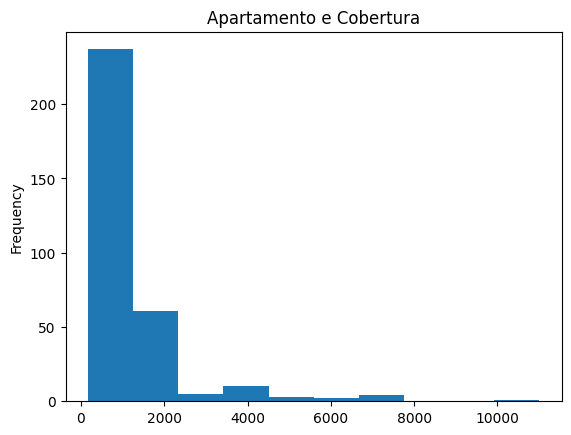

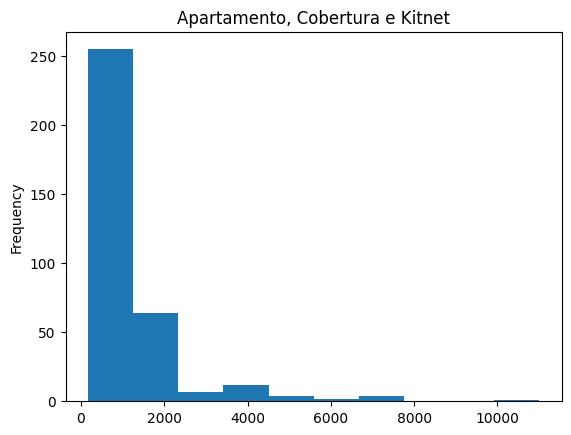

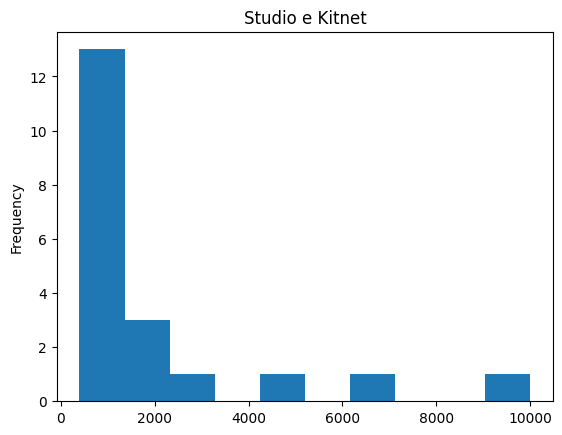

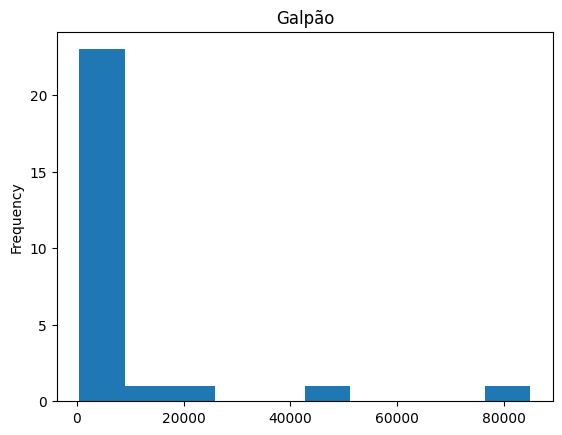

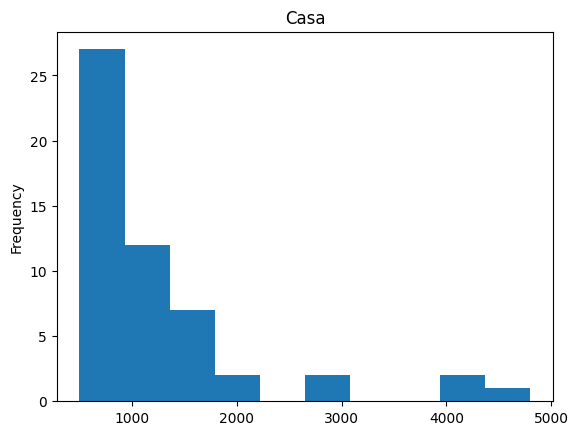

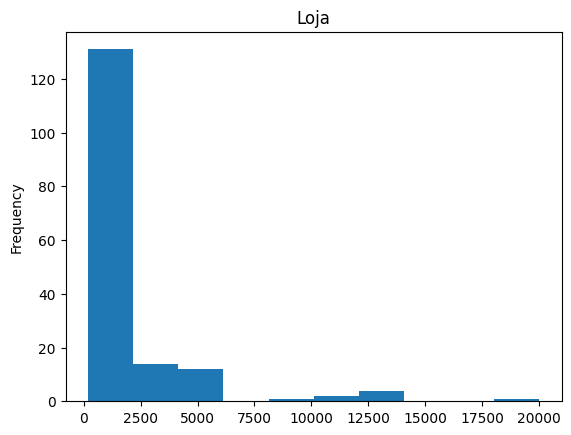

<Axes: title={'center': 'Sala'}, ylabel='Frequency'>

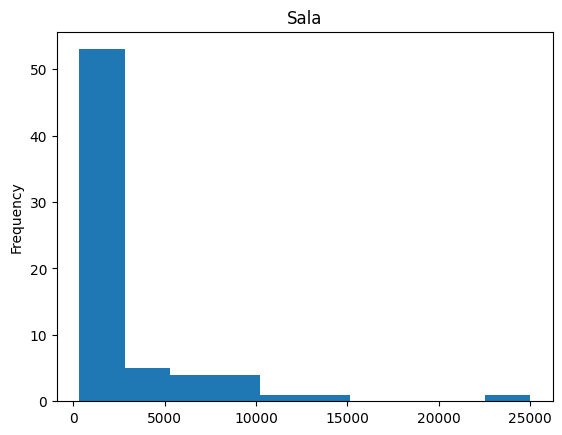

In [14]:
apartamento_cobertura_df['Preço'].plot(kind='hist', title="Apartamento e Cobertura")
plt.show()
apartamento_cobertura_kitnet_df['Preço'].plot(kind='hist', title="Apartamento, Cobertura e Kitnet")
plt.show()
studio_kitnet_df['Preço'].plot(kind='hist', title="Studio e Kitnet")
plt.show()
galpao_df['Preço'].plot(kind='hist', title="Galpão")
plt.show()
casa_df['Preço'].plot(kind='hist', title="Casa")
plt.show()
loja_df['Preço'].plot(kind='hist', title="Loja")
plt.show()
sala_df['Preço'].plot(kind='hist', title="Sala")



## Plotagem para comparação -> boxplot 


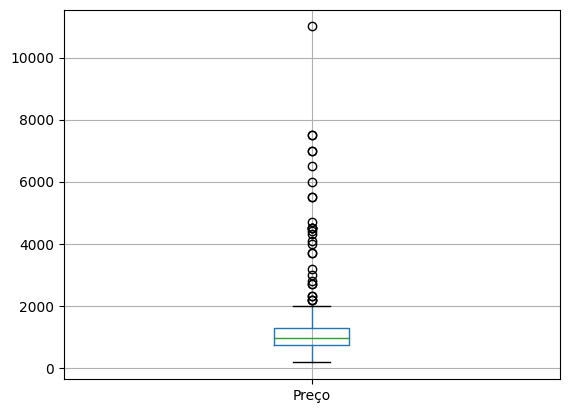

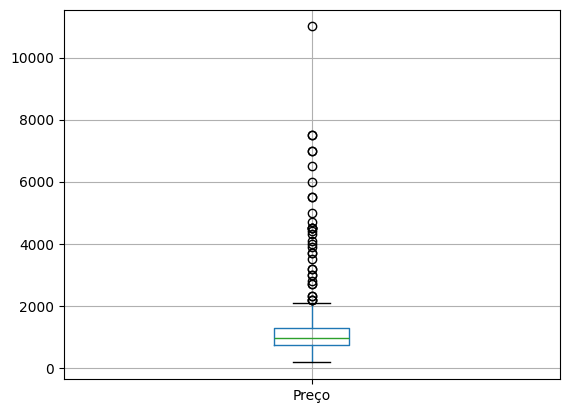

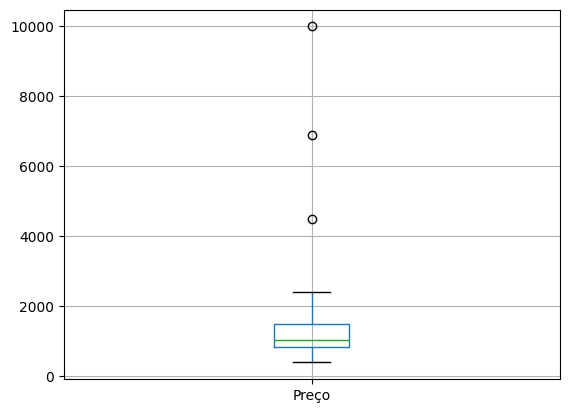

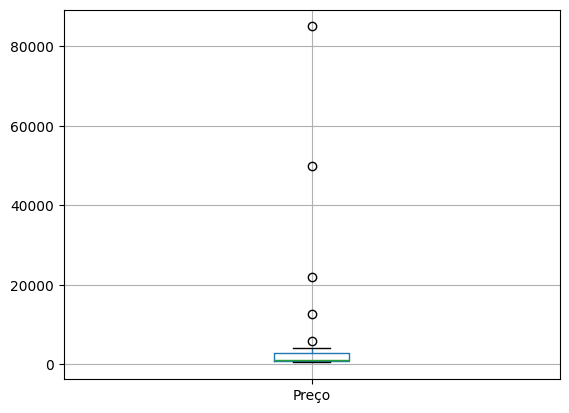

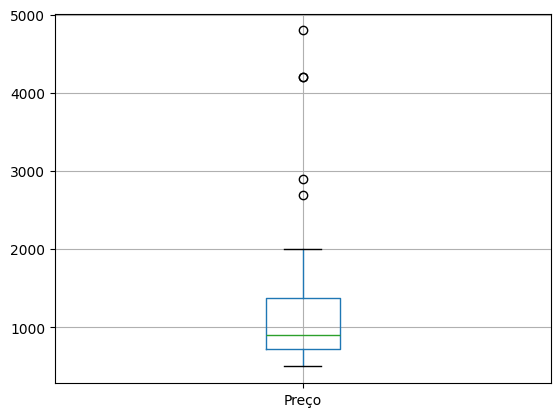

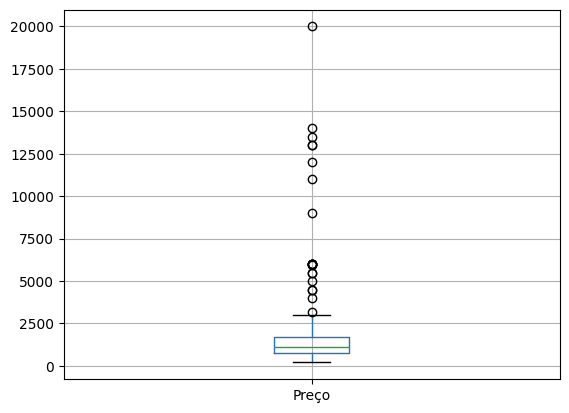

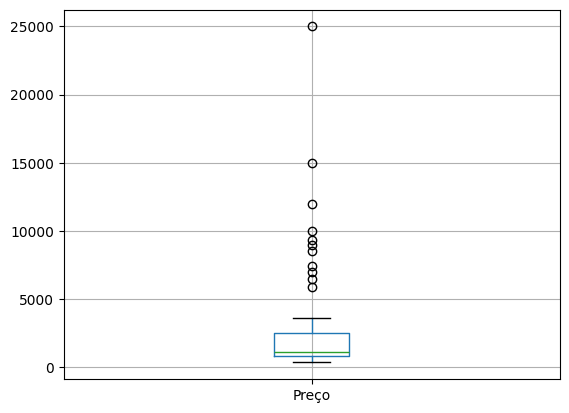

In [15]:
apartamento_cobertura_df.boxplot(column=['Preço'])
plt.show()
apartamento_cobertura_kitnet_df.boxplot(column=['Preço'])
plt.show()
studio_kitnet_df.boxplot(column=['Preço'])
plt.show()
galpao_df.boxplot(column=['Preço'])
plt.show()
casa_df.boxplot(column=['Preço'])
plt.show()
loja_df.boxplot(column=['Preço'])
plt.show()
sala_df.boxplot(column=['Preço'])
plt.show()


Tipos de Imóveis a serem avaliados:
*   Apartamento
*   Casa
*   Studio
*   Loja
*   Sala
*   Galpão

**OBS:** Ainda existem dois tipos de imóveis, Cobertura (Apartamento) e Kitnet (Studio). O que será feito com eles, cabe a você decidir.
*   Cobertura é um tipo de apartamento;
*   Kitnet é um termo que não é mais utilizado, se assemelha a um Studio.





## Modelo

**OBS:** Todos os modelos de regressão são permitidos.


**Algumas observações**
*   '*test_size*': Distribuição em porcentagem para dados de teste;
*   '*random_state*': Forma que os dados são separados (aleatoriedade).

In [17]:
#Modelo -> Random Forest(RF)

In [18]:
def runRandomForest(dataframe,random_state):
  X = dataframe.drop(['Preço'], axis=1)
  # Outputs
  y = [i[0] for i in dataframe[['Preço']].values]
  # Dados de treino e teste
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

  # Remoção do Tipo de Imóvel para o código compilar (para uma boa prevista, recomenda-se utilizar esse atributo de alguma forma)
  X_train = X_train.drop(['Tipo'], axis=1)
  X_test = X_test.drop(['Tipo'], axis=1)

  # Modelo Random Forest
  model = RandomForestClassifier()
  model.fit(X_train, y_train)
  y_predict = model.predict(X_test)

  R2 = r2_score(y_test, y_predict)
  #print("R2   =", R2)
  RMSE = math.sqrt(mean_squared_error(y_test, y_predict))
  #print("RMSE =", RMSE)
  MAPE = mean_absolute_percentage_error(y_test, y_predict)
  #print("MAPE =", MAPE)

  return R2, RMSE, MAPE


#Modelo -> KNeighborsRegressor

In [19]:
def runKNN(dataframe, random_state):
  X = dataframe.drop(['Preço'], axis=1)
  # Outputs
  y = [i[0] for i in dataframe[['Preço']].values]
  # Dados de treino e teste
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

  # Remoção do Tipo de Imóvel para o código compilar (para uma boa prevista, recomenda-se utilizar esse atributo de alguma forma)
  X_train = X_train.drop(['Tipo'], axis=1)
  X_test = X_test.drop(['Tipo'], axis=1)

  # Modelo KNN
  model = KNeighborsRegressor(n_neighbors=2)
  model.fit(X_train, y_train)
  y_predict = model.predict(X_test)

  R2 = r2_score(y_test, y_predict)
  #print("R2   =", R2)
  RMSE = math.sqrt(mean_squared_error(y_test, y_predict))
  #print("RMSE =", RMSE)
  MAPE = mean_absolute_percentage_error(y_test, y_predict)
  #print("MAPE =", MAPE)

  return R2, RMSE, MAPE


#Modelo -> RandomForestRegressor(RFR)

,R2,RMSE,MAPE
count,30.000000,30.000000,30.000000
mean,0.524022,804.876405,0.279426
std,0.299905,224.100475,0.041758
min,-0.654448,398.379306,0.201047
25%,0.378233,652.745207,0.249391
50%,0.620640,761.361149,0.269618
75%,0.723458,880.604498,0.313682
max,0.830674,1341.819814,0.363900


In [20]:
def runRandomForestRegressor(dataframe, random_state):
    X = dataframe.drop(['Preço'], axis=1)
    y = dataframe['Preço']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    X_train = X_train.drop(['Tipo'], axis=1)
    X_test = X_test.drop(['Tipo'], axis=1)

    # Modelo Random Forest Regressor
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)

    R2 = r2_score(y_test, y_predict)
    #print("R2   =", R2)
    RMSE = math.sqrt(mean_squared_error(y_test, y_predict))
    #print("RMSE =", RMSE)
    MAPE = mean_absolute_percentage_error(y_test, y_predict)
    #print("MAE =", MAPE)
    return R2, RMSE, MAPE

#Funções para geração de testes
def run_experiment_test(dataframe, func):
  results = []
  for i in range (0, 30):
    results.append(func(dataframe, i))
  
  return results

def run_experiment_metrics(dataframe, func):
  results = run_experiment_test(dataframe, func)
  results_df = pd.DataFrame(results, columns=['R2', 'RMSE', 'MAPE'])
  return results_df


In [39]:
def remove_outliers(dataframe):
    dataframe.boxplot(column=['Preço'])
    plt.show()
    print(dataframe.shape)
    Q1 = dataframe['Preço'].quantile(0.25)
    Q3 = dataframe['Preço'].quantile(0.75)
    IQR = Q3 - Q1
    
    mask = ((dataframe['Preço'] < (Q1 - 1.5 * IQR)) | (dataframe['Preço'] > (Q3 + 1.5 * IQR)))
    dataframe[mask] = np.nan
    
    return  dataframe.dropna()
    
   # dataframe.boxplot(column=['Preço'])
   # plt.show()
    #print(dataframe.shape)
    

## Análise de remoção de outliers

In [0]:
#apartamento_cobertura_df = remove_outliers(apartamento_cobertura_df)

In [42]:

#Testes para os três modelos para o primeiro dataframe: apenas apartamentos e coberturas por definição
apartamento_cobertura_df_KNN = run_experiment_metrics(apartamento_cobertura_df, runKNN)
apartamento_cobertura_df_RFR = run_experiment_metrics(apartamento_cobertura_df, runRandomForestRegressor)
apartamento_cobertura_df_RF = run_experiment_metrics(apartamento_cobertura_df, runRandomForestRegressor)

In [43]:

#Lista das médias das métricas 
lista_apartamento_cobertura_df = [apartamento_cobertura_df_KNN.describe(include='all').loc['mean'], apartamento_cobertura_df_RFR.describe(include='all').loc['mean'],  apartamento_cobertura_df_RF.describe(include='all').loc['mean']]

#Dataframe consolidado das médias das métricas
consolidado_apartamento_cobertura_df = pd.DataFrame(lista_apartamento_cobertura_df)
consolidado_apartamento_cobertura_df



,R2,RMSE,MAPE
mean,-0.045863,283.277135,0.254545
mean,0.246730,241.074089,0.220574
mean,0.232674,243.397846,0.222780


In [28]:

#Testes para os três modelos para o segundo dataframe: Apartamentos, coberturas e kitnets com mais de um quarto
apartamento_cobertura_kitnet_df_KNN = run_experiment_metrics(apartamento_cobertura_kitnet_df, runKNN)
apartamento_cobertura_kitnet_df_RFR = run_experiment_metrics(apartamento_cobertura_kitnet_df, runRandomForestRegressor)
apartamento_cobertura_kitnet_df_RF = run_experiment_metrics(apartamento_cobertura_kitnet_df, runRandomForestRegressor)

#Lista das médias das métricas
apartamento_cobertura_kitnet_df = [apartamento_cobertura_kitnet_df_KNN.describe(include='all').loc['mean'], apartamento_cobertura_kitnet_df_RFR.describe(include='all').loc['mean'],  apartamento_cobertura_kitnet_df_RF.describe(include='all').loc['mean']]

#Dataframe consolidado das médias das métricas
consolidado_apartamento_cobertura_kitnet_df = pd.DataFrame(apartamento_cobertura_kitnet_df)
consolidado_apartamento_cobertura_kitnet_df

,R2,RMSE,MAPE
mean,0.365648,871.952885,0.362552
mean,0.642730,700.078951,0.291116
mean,0.644429,695.110428,0.294539


In [29]:



#Testes para os três modelos para o terceiro dataframe: Studios e kitnets, com apenas um quarto
studio_kitnet_df_KNN = run_experiment_metrics(studio_kitnet_df, runKNN)
studio_kitnet_df_RFR = run_experiment_metrics(studio_kitnet_df, runRandomForestRegressor)
studio_kitnet_df_RF = run_experiment_metrics(studio_kitnet_df, runRandomForestRegressor)

#Lista das médias das métricas
lista_studio_kitnet_df = [studio_kitnet_df_KNN.describe(include='all').loc['mean'], studio_kitnet_df_RFR.describe(include='all').loc['mean'],  studio_kitnet_df_RF.describe(include='all').loc['mean']]

#Dataframe consolidado das médias das métricas
consolidado_studio_kitnet_df = pd.DataFrame(lista_studio_kitnet_df)
consolidado_studio_kitnet_df

,R2,RMSE,MAPE
mean,-0.736478,1595.584879,0.407425
mean,-1.818430,920.229606,0.529865
mean,-1.750009,933.358885,0.544724


In [30]:


#Testes para os três modelos para o quarto dataframe: Galpões 
galpao_df_KNN = run_experiment_metrics(galpao_df, runKNN)
galpao_df_RFR = run_experiment_metrics(galpao_df, runRandomForestRegressor)
galpao_df_RF = run_experiment_metrics(galpao_df, runRandomForestRegressor)

#Lista das médias das métricas
lista_galpao_df = [galpao_df_KNN.describe(include='all').loc['mean'], galpao_df_RFR.describe(include='all').loc['mean'],  galpao_df_RF.describe(include='all').loc['mean']]

#Dataframe consolidado das médias das métricas
consolidado_galpao_df = pd.DataFrame(lista_galpao_df)
consolidado_galpao_df



,R2,RMSE,MAPE
mean,-34.032166,14948.382540,2.081271
mean,-32.703897,14826.686242,3.141027
mean,-29.989343,14755.865470,3.090813


In [31]:
#Testes para os três modelos para o quinto dataframe: Casas
casa_df_KNN = run_experiment_metrics(casa_df, runKNN)
casa_df_RFR = run_experiment_metrics(casa_df, runRandomForestRegressor)
casa_df_RF = run_experiment_metrics(casa_df, runRandomForestRegressor)

#Lista das médias das métricas
lista_casa_df = [casa_df_KNN.describe(include='all').loc['mean'], casa_df_RFR.describe(include='all').loc['mean'],  casa_df_RF.describe(include='all').loc['mean']]

#Dataframe consolidado das médias das métricas
consolidado_casa_df = pd.DataFrame(lista_casa_df)
consolidado_casa_df

,R2,RMSE,MAPE
mean,0.108190,658.602041,0.378013
mean,0.567672,431.152337,0.332925
mean,0.569126,433.071181,0.331447


In [32]:

#Testes para os três modelos para o sexto dataframe: Loja
loja_df_KNN = run_experiment_metrics(loja_df, runKNN)
loja_df_RFR = run_experiment_metrics(loja_df, runRandomForestRegressor)
loja_df_RF = run_experiment_metrics(loja_df, runRandomForestRegressor)

#Lista das médias das métricas
lista_loja_df = [loja_df_KNN.describe(include='all').loc['mean'], loja_df_RFR.describe(include='all').loc['mean'],  loja_df_RF.describe(include='all').loc['mean']]

#Dataframe consolidado das médias das métricas
consolidado_loja_df = pd.DataFrame(lista_loja_df)
consolidado_loja_df

,R2,RMSE,MAPE
mean,-0.157373,2656.134534,0.950236
mean,0.087484,2436.531698,0.804742
mean,0.091564,2431.963115,0.793373


In [33]:

#Testes para os três modelos para o sétimo dataframe: Sala
sala_df_KNN = run_experiment_metrics(sala_df, runKNN)
sala_df_RFR = run_experiment_metrics(sala_df, runRandomForestRegressor)
sala_df_RF = run_experiment_metrics(sala_df, runRandomForestRegressor)

#Lista das médias das métricas
lista_sala_df = [sala_df_KNN.describe(include='all').loc['mean'], sala_df_RFR.describe(include='all').loc['mean'],  sala_df_RF.describe(include='all').loc['mean']]

#Dataframe consolidado das médias das métricas
consolidado_sala_df = pd.DataFrame(lista_sala_df)
consolidado_sala_df



,R2,RMSE,MAPE
mean,0.243081,2410.020123,0.628622
mean,0.529261,2148.021081,0.509970
mean,0.504591,2184.298744,0.508639


### Aplicação

**OBS:** Modelos de regressão não conseguem prever textos (ex: Apartamento 'R$'), o que você irá fazer com esse atributo?

## Métricas

São obrigatórias a avaliação das seguintes métricas:



*   $R^2$: Quanto mais próximo de 1, melhor o resultado
*   RMSE: Quanto menor o valor, melhor o resultado
*   MAPE: Quanto mais próximo de 0, melhor o resultado

**OBS:** Mais métricas para análise podem ser utilizadas.

## Teste Online

**OBS:** Pode mudar essa parte de acordo com as suas necessidades.

In [ ]:
# Imputando os dados
ty = input("Tipo do Imóvel: ")
m_2 = int(input("Metros quadrados: "))
n_q = int(input("Número de quartos: "))
n_b = int(input("Número de banheiros: "))
n_vg = int(input("Número de vagas de garagem: "))
cond = float(input("Preço do Condomínio: "))
iptu = float(input("Preço do IPTU: "))
bairro = input("Bairro (texto): ")
# Transformando o bairro em texto para Lat, Lon
geolocator = Nominatim(user_agent="geolocalização")
location = geolocator.geocode(bairro + ', Juiz de Fora - MG')
lat = location.latitude; lon = location.longitude

# Colocando os dados em um Dataframe
col_online = ['m2', 'Quartos', 'Banheiros', 'Vagas', 'Condomínio', 'IPTU',	'Latitude', 'Longitude']
X_online = [m_2, n_q, n_b, n_vg, cond, iptu, lat, lon]
X_online = pd.DataFrame([X_online], columns = col_online)

# Prevendo o valor do preço do imóvel
y_online = model.predict(X_online) #OBS: Colocar o nome do seu modelo treinado

# Resultado
print(f"Preço do imóvel previsto:{y_online}")